# This notebook contains the Stacks parameter tests, final parameters used and analyses to identify sex linked markers for the RADseq dataset of <i> Aristelliger_expectatus</i>. 

It is a dataset from Tony Gamble's paper (Gamble, T. et al., 2015. Restriction Site-Associated DNA Sequencing (RAD-seq) Reveals an Extraordinary Number of Transitions among Gecko Sex-Determining Systems. Molecular biology and evolution, 32(5), pp.1296–1309.) 
## Sample set:
7 Females
7 Males

Samples from Several populations as descibed in paper

They only used the sex specific tags approach. But found 7 female specific tags, validated 2 with PCR and so they conclude that it is ZW. 




In [1]:
%matplotlib inline
import os
import wget ## used "sudo pip install wget" in command line to get package.
import Incremental_U as IncU ## Get this sorted
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

##Stacks scripts:


### All samples SNP dataset:

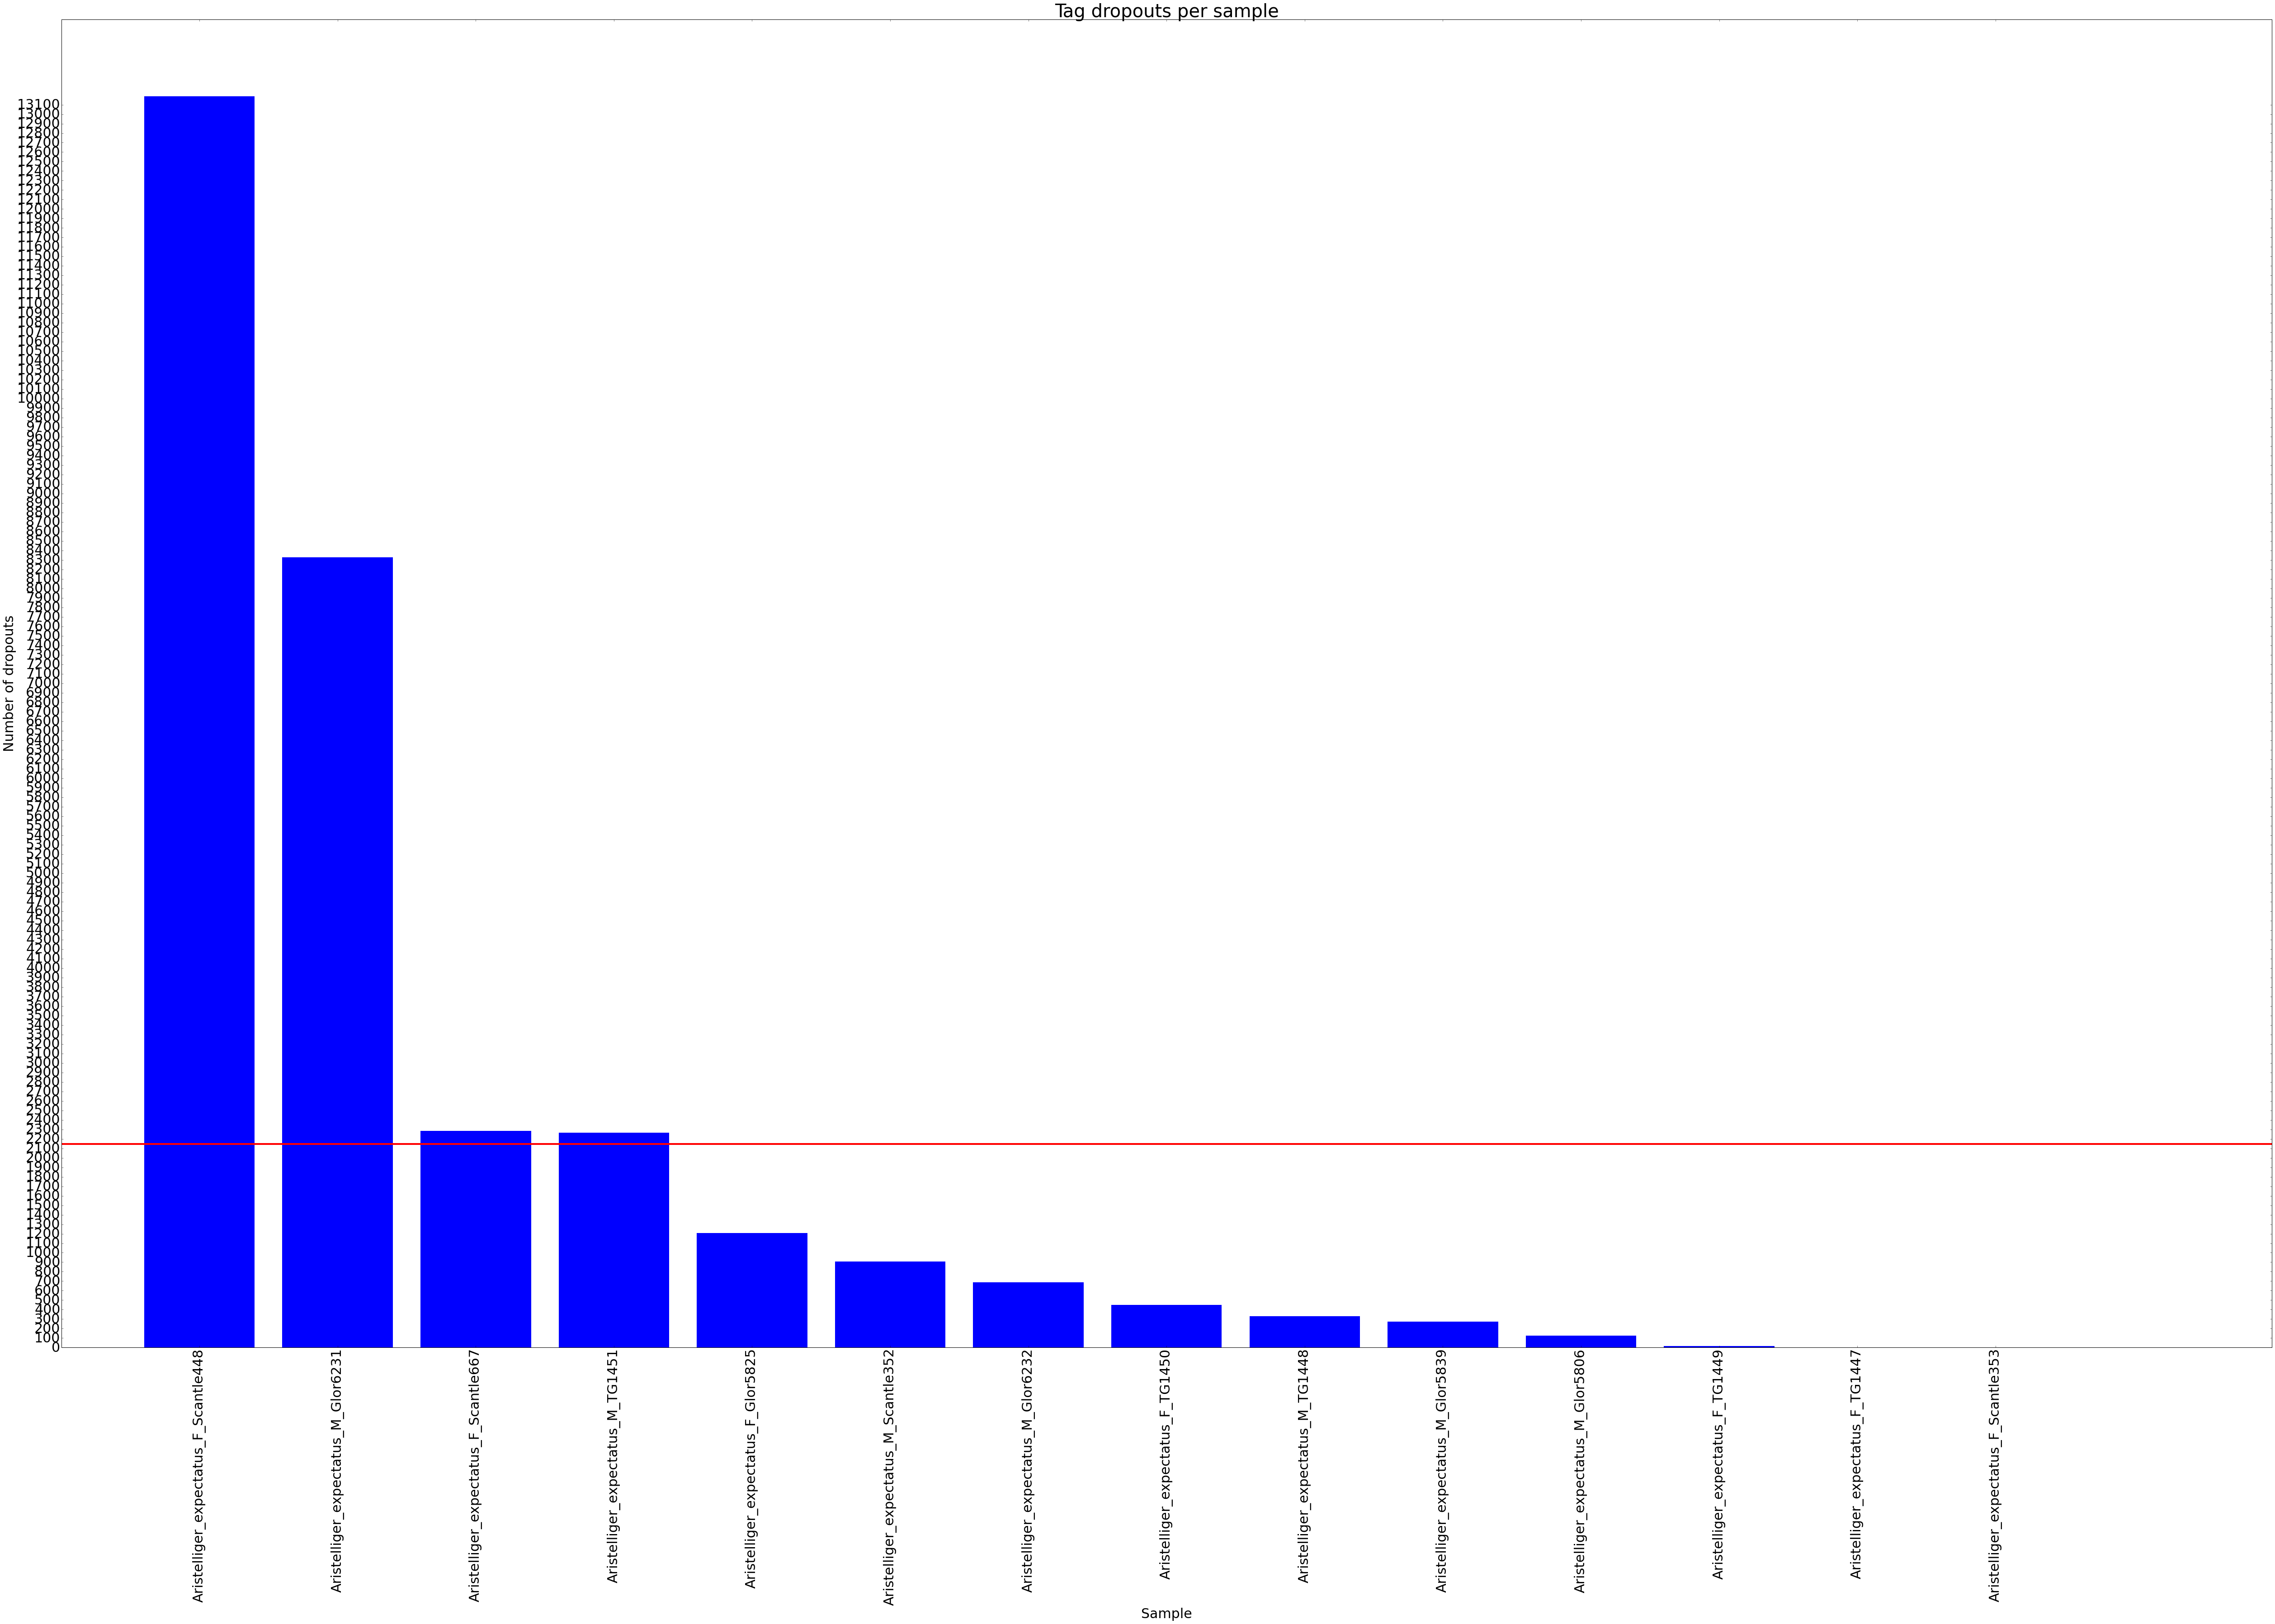

Outputs written to:
/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/blacklist.txt


In [3]:
wd = "/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

A couple of samples aren't great, but it is one male and one female. So shouldn't be too much of a problem

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

### First using all samples (from both populations) pooled together

In [12]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Populations_all/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Geckos/Aristelliger_expectatus/Stacks/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP heterozygosity approach #####
 
Number of loci = 19861
Number of samples = 14
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 19860
Number of putative X linked snps = 5
Number of putative X linked tags = 5
Number of putative Z linked markers = 60
Number of putative Z linked tags = 60

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 7
Number of males: 7
Number of Putative Y linked tags: 10
Number of Putative W linked tags: 3

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 15
Final number of ZW tags = 63


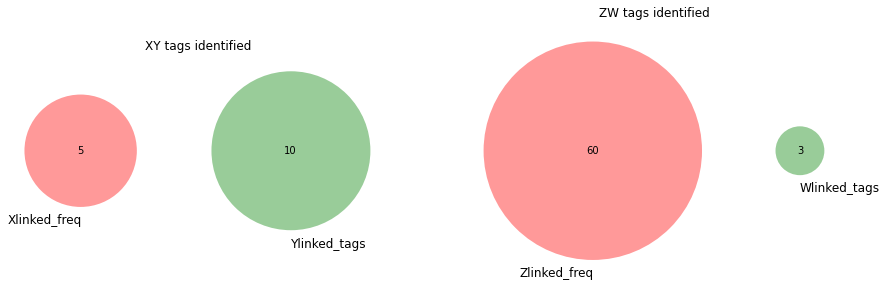

In [13]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "011", write_files= False)

### Now population "h" (West Japan) only

In [2]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_h/batch_1_kept.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_h/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 44182
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 44181
Number of putative X linked snps = 522
Number of putative X linked tags = 522
Number of putative Z linked markers = 178
Number of putative Z linked tags = 178


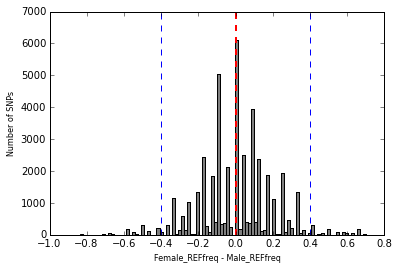


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 44182
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 44181
Number of putative X linked snps = 64
Number of putative X linked tags = 64
Number of putative Z linked markers = 14
Number of putative Z linked tags = 14

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 4

In [ ]:
XYset_h, ZWset_h = MISC.Super_SLM_finder(Parameter_dict, "111")

### Now pop "t" 


In [17]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t/batch_1_kept.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP heterozygosity approach #####
 
Number of loci = 57147
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 57146
Number of putative X linked snps = 785
Number of putative X linked tags = 785
Number of putative Z linked markers = 105
Number of putative Z linked tags = 105

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 5
Number of males: 5
Number of Putative Y linked tags: 57
Number of Putative W linked tags: 20

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rjaponica/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 842
Final number of ZW tags = 125


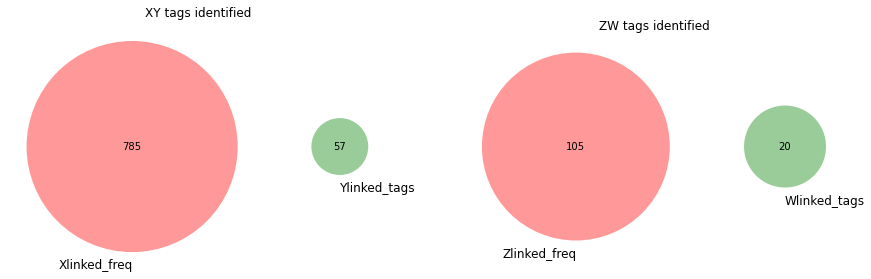

In [18]:
XYset_t, ZWset_t = MISC.Super_SLM_finder(Parameter_dict, "011")

### Are there shared tags between these two sets of putative XY linked markers?



In [22]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

<matplotlib_venn._common.VennDiagram instance at 0x7f1ee38790e0>

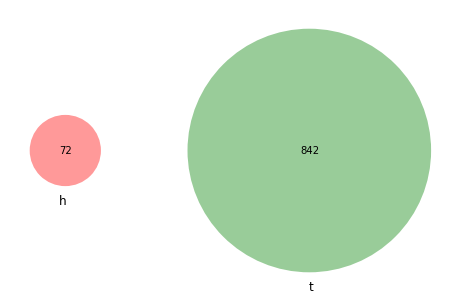

In [25]:
plt.figure(figsize = (8,8))
venn2([XYset_h, XYset_t], ("h", "t"))

The answer is no. . . . 

So what do the samples look like in a PCA at these loci?

In [44]:
vcf_path = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/batch_1_kept.vcf"
MISC.filter_vcf(vcf_path, XYset_t , "Pop_t_XY_linked_snps_freq_het.vcf")

In [45]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Pop_t_XY_linked_snps_freq_het.vcf > $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf --recode A --allow-extra-chr -out $wd/Pop_t_XY_linked_snps_freq_het_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.fam
written.


In [48]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Pop_t_XY_linked_snps_freq_het_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



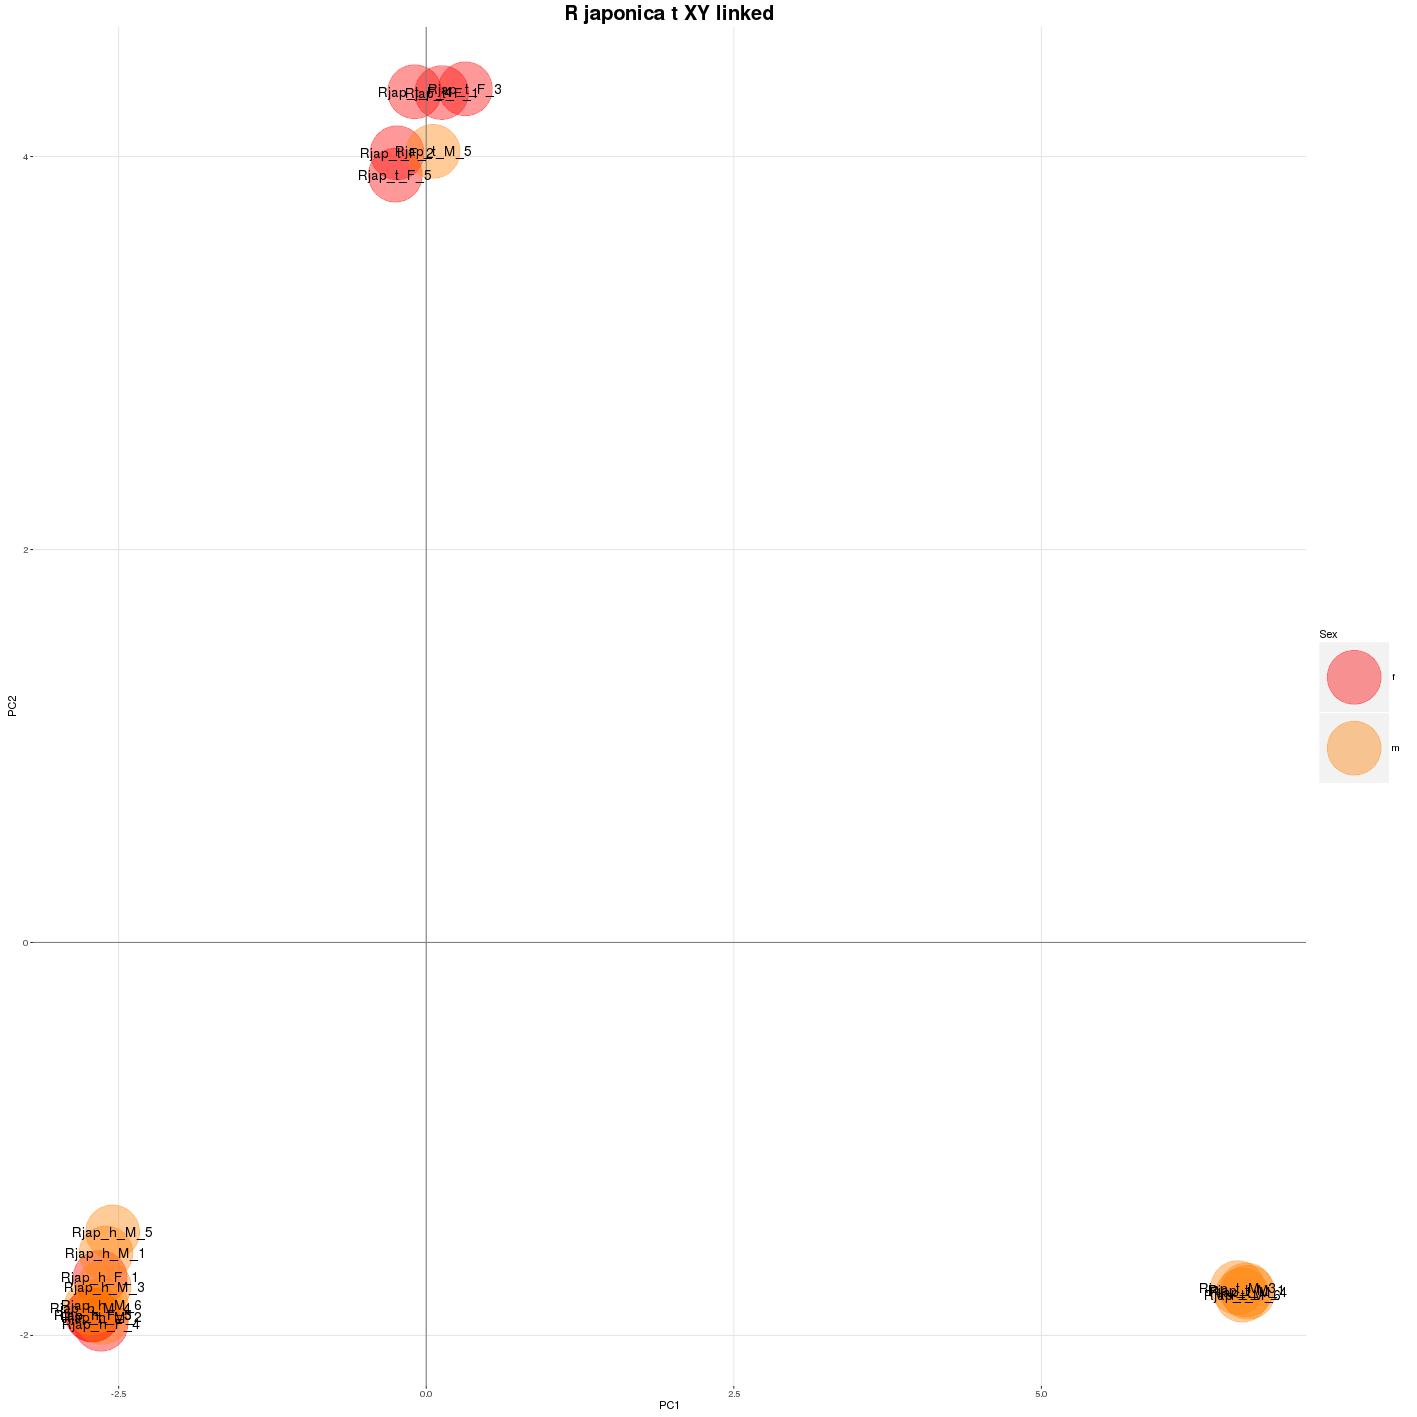

In [49]:

%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R japonica t XY linked", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

### The "t" set of markers splits all the samples in t by male and femlae but not the "h" population. There does look like there is one miss-sexed female though. 

In [53]:
vcf_path = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/batch_1_kept.vcf"
MISC.filter_vcf(vcf_path, XYset_h , "Pop_h_XY_linked_snps_freq_het.vcf")

In [54]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Pop_h_XY_linked_snps_freq_het.vcf > $wd/Pop_h_XY_linked_snps_freq_het_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Pop_h_XY_linked_snps_freq_het_altered.vcf --recode A --allow-extra-chr -out $wd/Pop_h_XY_linked_snps_freq_het_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_h_XY_linked_snps_freq_het_adegenet_plink-temporary.fam
written.


In [55]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Pop_h_XY_linked_snps_freq_het_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 




 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



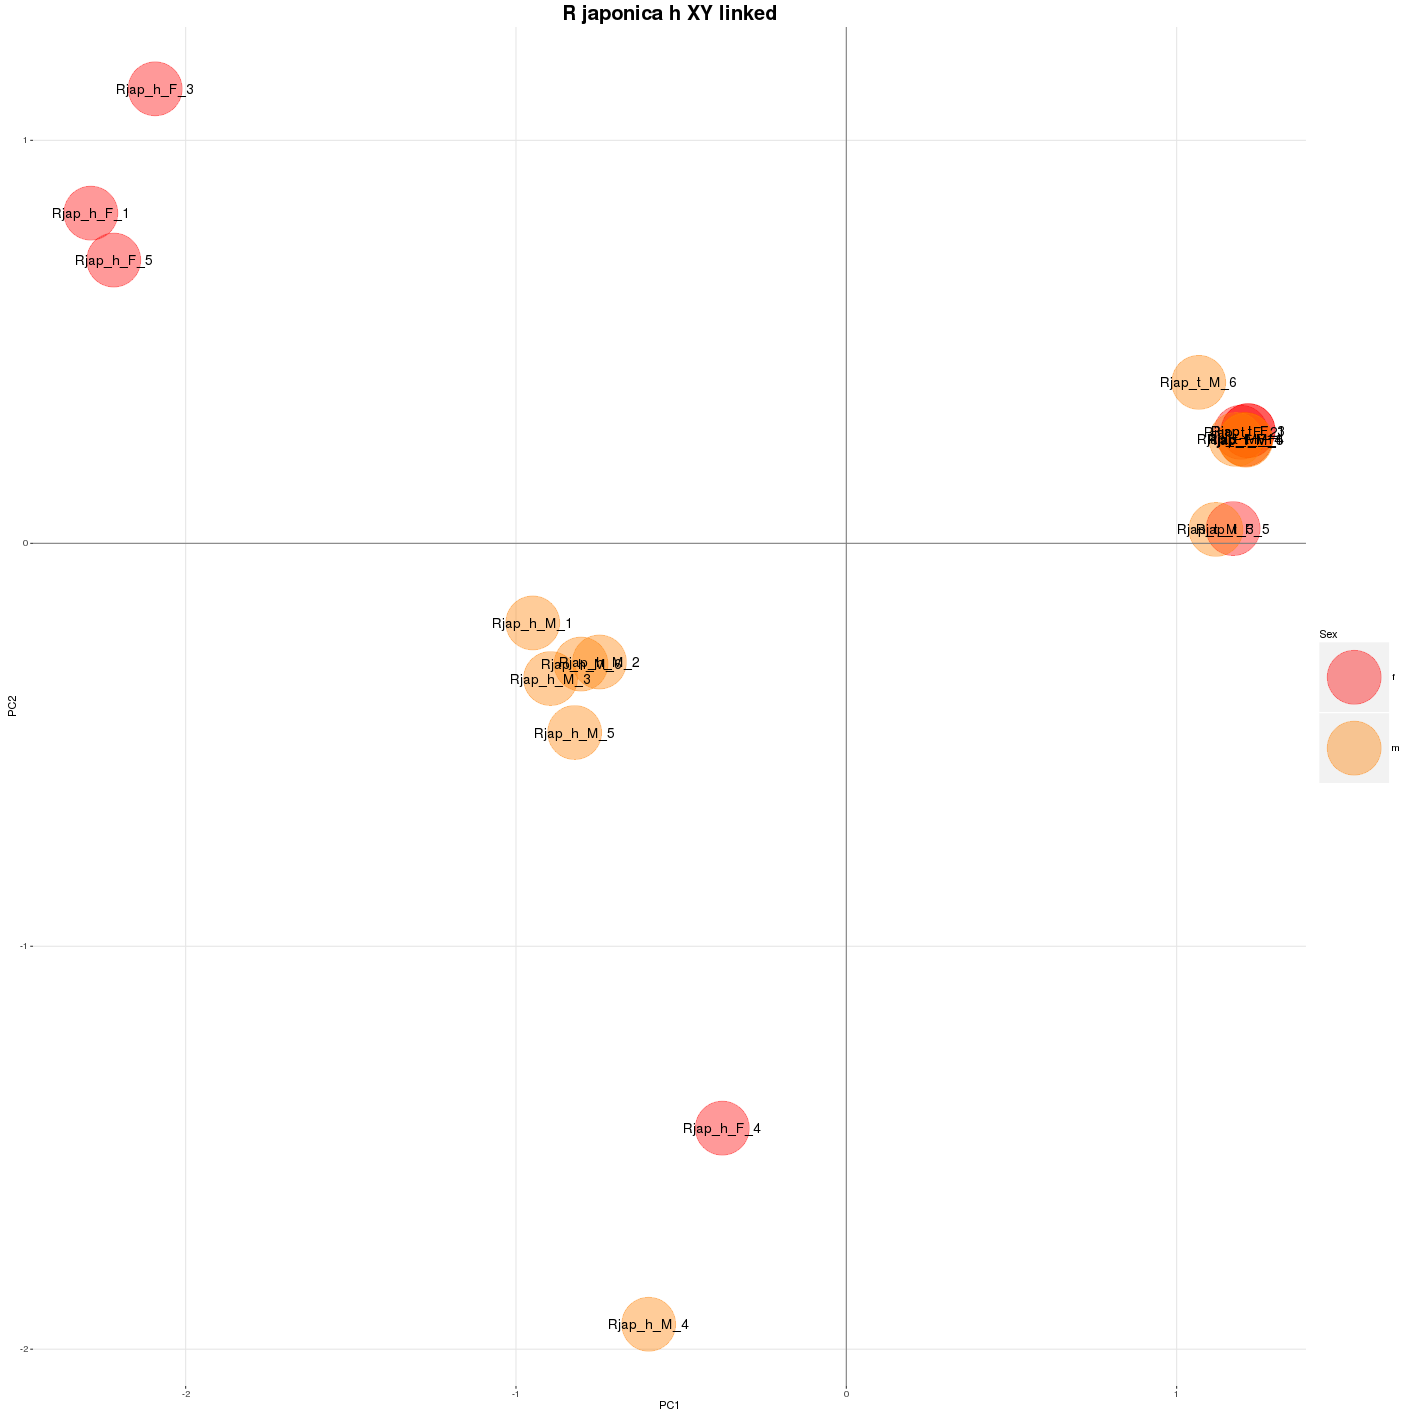

In [56]:

%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R japonica h XY linked", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

### "h" pop is a bit more of a mess. 


Next, re-run populations for the t population, correcting the mis-sexed sample. Then that is the final number of markers for this dataset. I don't trust the h population markers though!

I used strict stacks parameters here (-r = 1, -p = 2, min_maf = 0.05)


In [82]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 39037
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 39036
Number of putative X linked snps = 959
Number of putative X linked tags = 959
Number of putative Z linked markers = 2311
Number of putative Z linked tags = 2311


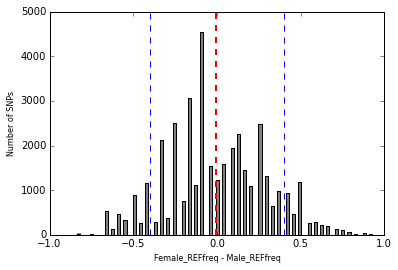


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 39037
Number of samples = 10
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 39036
Number of putative X linked snps = 651
Number of putative X linked tags = 651
Number of putative Z linked markers = 48
Number of putative Z linked tags = 48

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 6
Number of males: 4
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 182

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rjaponica/Stacks

 ## After merging tags accross methods ## 

Final number of XY tags = 1000
Final number of ZW tags = 2505


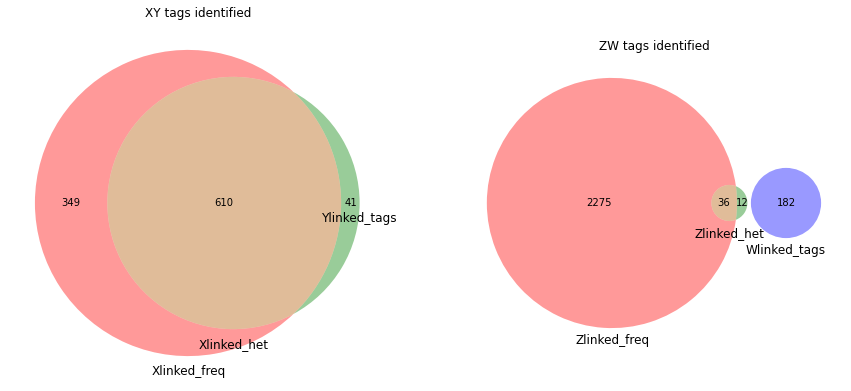

In [83]:
XYset_t, ZWset_t = MISC.Super_SLM_finder(Parameter_dict, "111")

### Ok so there's a convincing number of loci here! 

How do they look in all samples:

In [67]:
vcf_path = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned/batch_1.vcf"
MISC.filter_vcf(vcf_path, XYset_t , "Pop_t_XY_linked_snps_freq_het.vcf")

In [70]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Pop_t_XY_linked_snps_freq_het.vcf > $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf --recode A --allow-extra-chr -out $wd/Pop_t_XY_linked_snps_freq_het_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned//Pop_t_XY_linked_snps_freq_het_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned//Pop_t_XY_linked_snps_freq_het_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned//Pop_t_XY_linked_snps_freq_het_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rja

In [73]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t_reassigned/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Pop_t_XY_linked_snps_freq_het_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



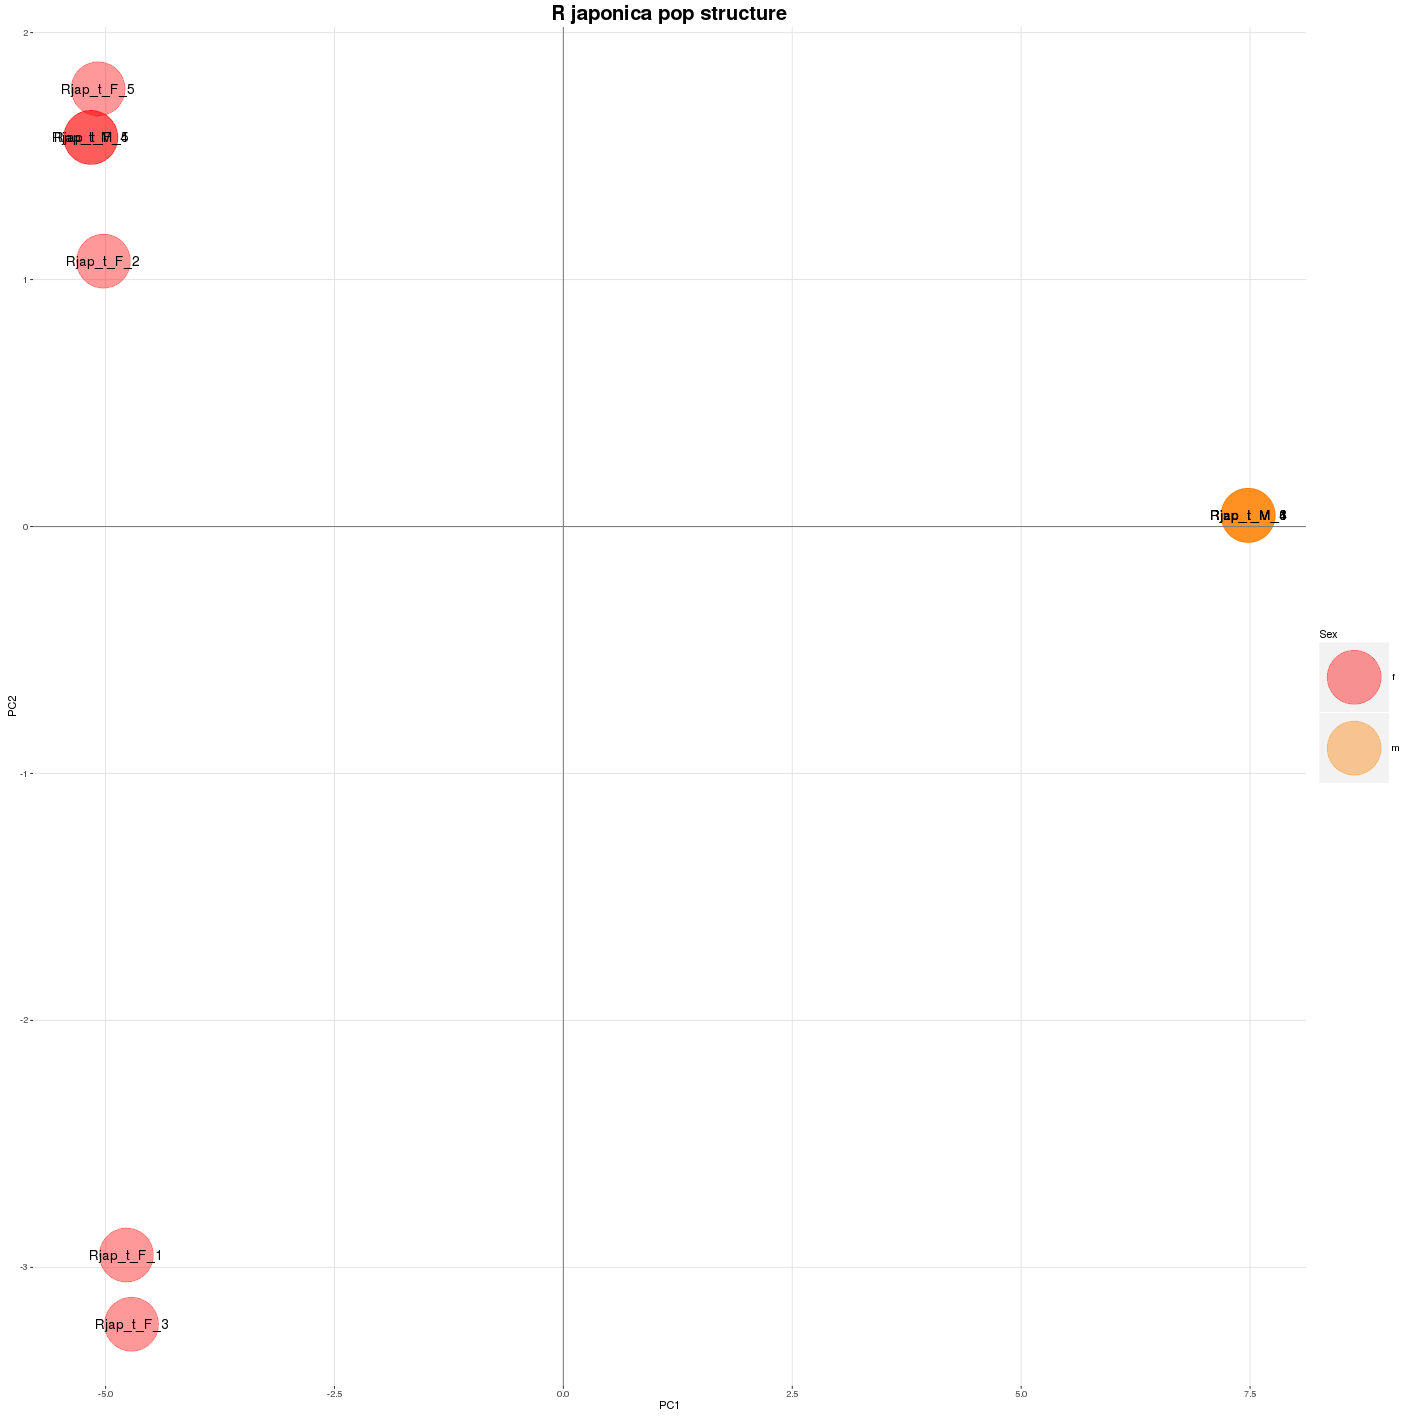

In [74]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R japonica pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

There is no difference in the male genotypes here. But I guess that is a product of the strict parameters I used. However they are from a single clutch, so it should be a similar story in real life anayway. 

In [63]:
vcf_path = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/batch_1.vcf"
MISC.filter_vcf(vcf_path, XYset_t , "Pop_t_XY_linked_snps_freq_het.vcf")

In [64]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Pop_t_XY_linked_snps_freq_het.vcf > $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Pop_t_XY_linked_snps_freq_het_altered.vcf --recode A --allow-extra-chr -out $wd/Pop_t_XY_linked_snps_freq_het_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all//Pop_t_XY_linked_snps_freq_het_adegenet_plink-temporary.fam
written.


In [75]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_all/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



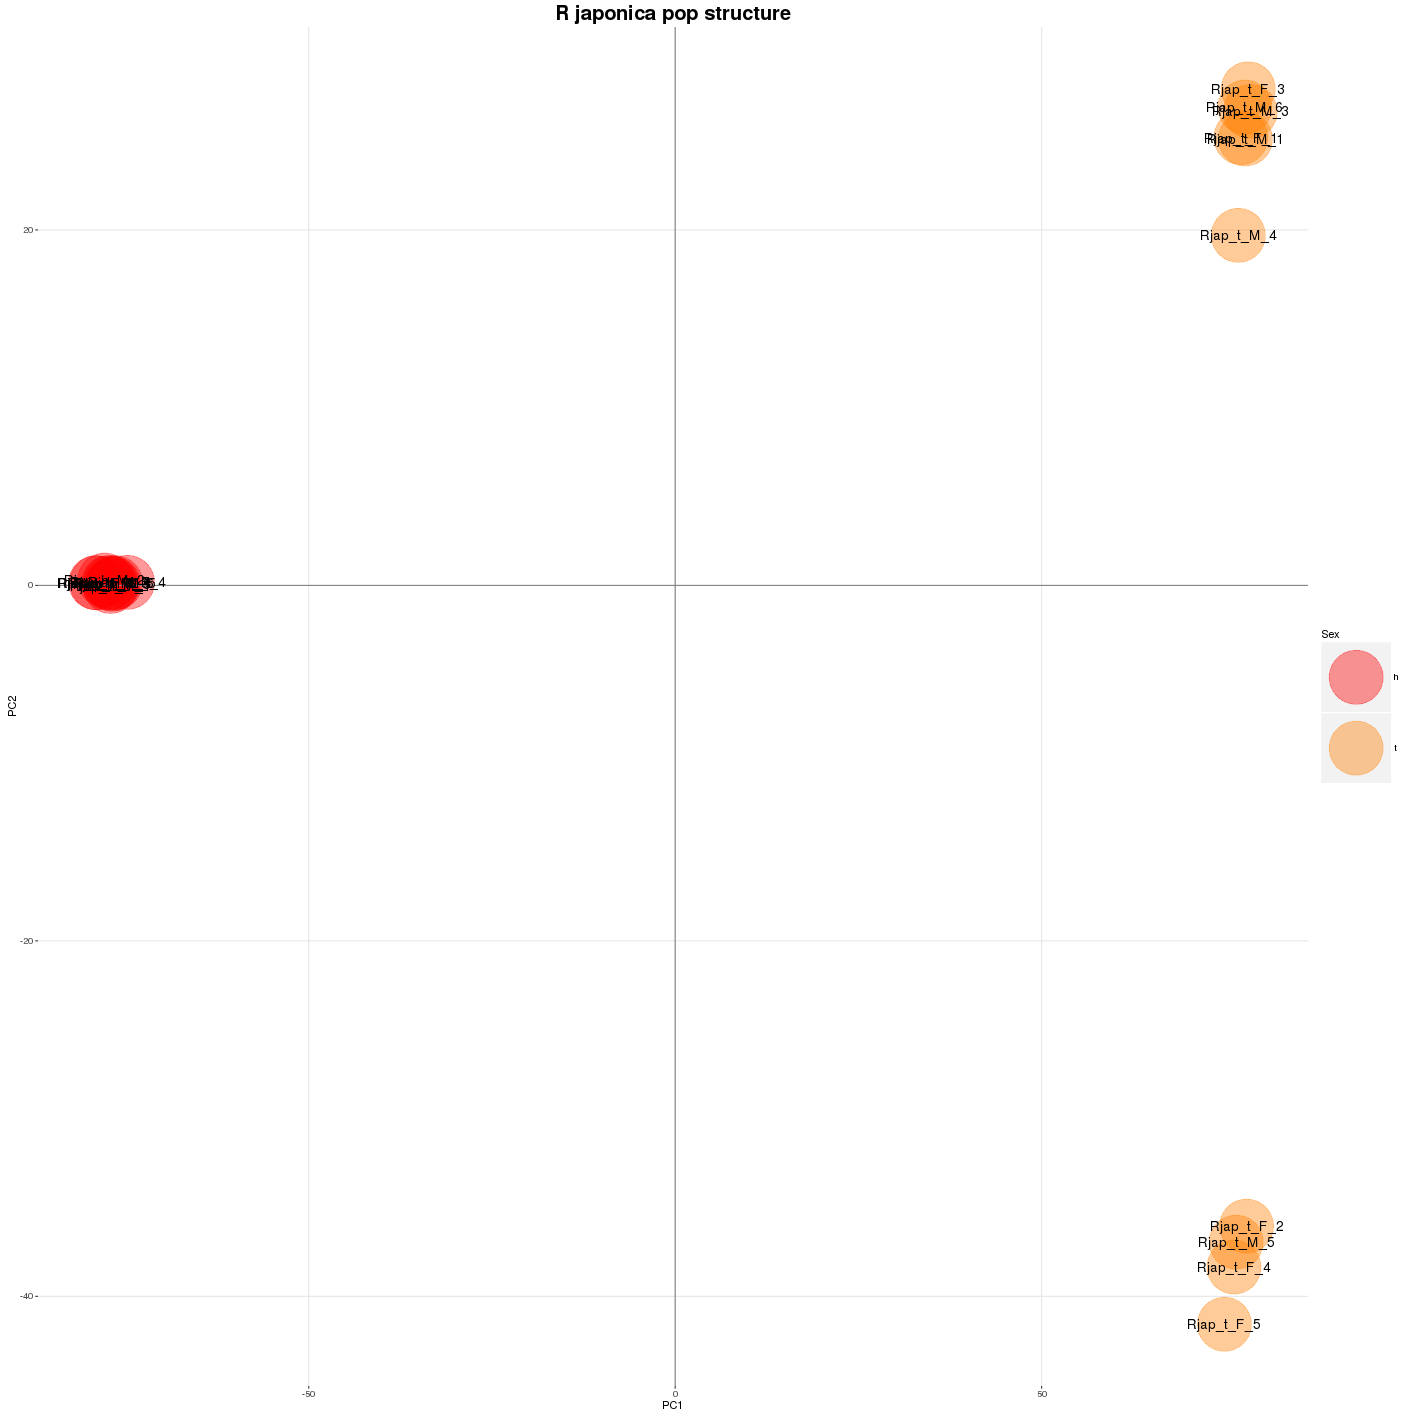

In [78]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R japonica pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

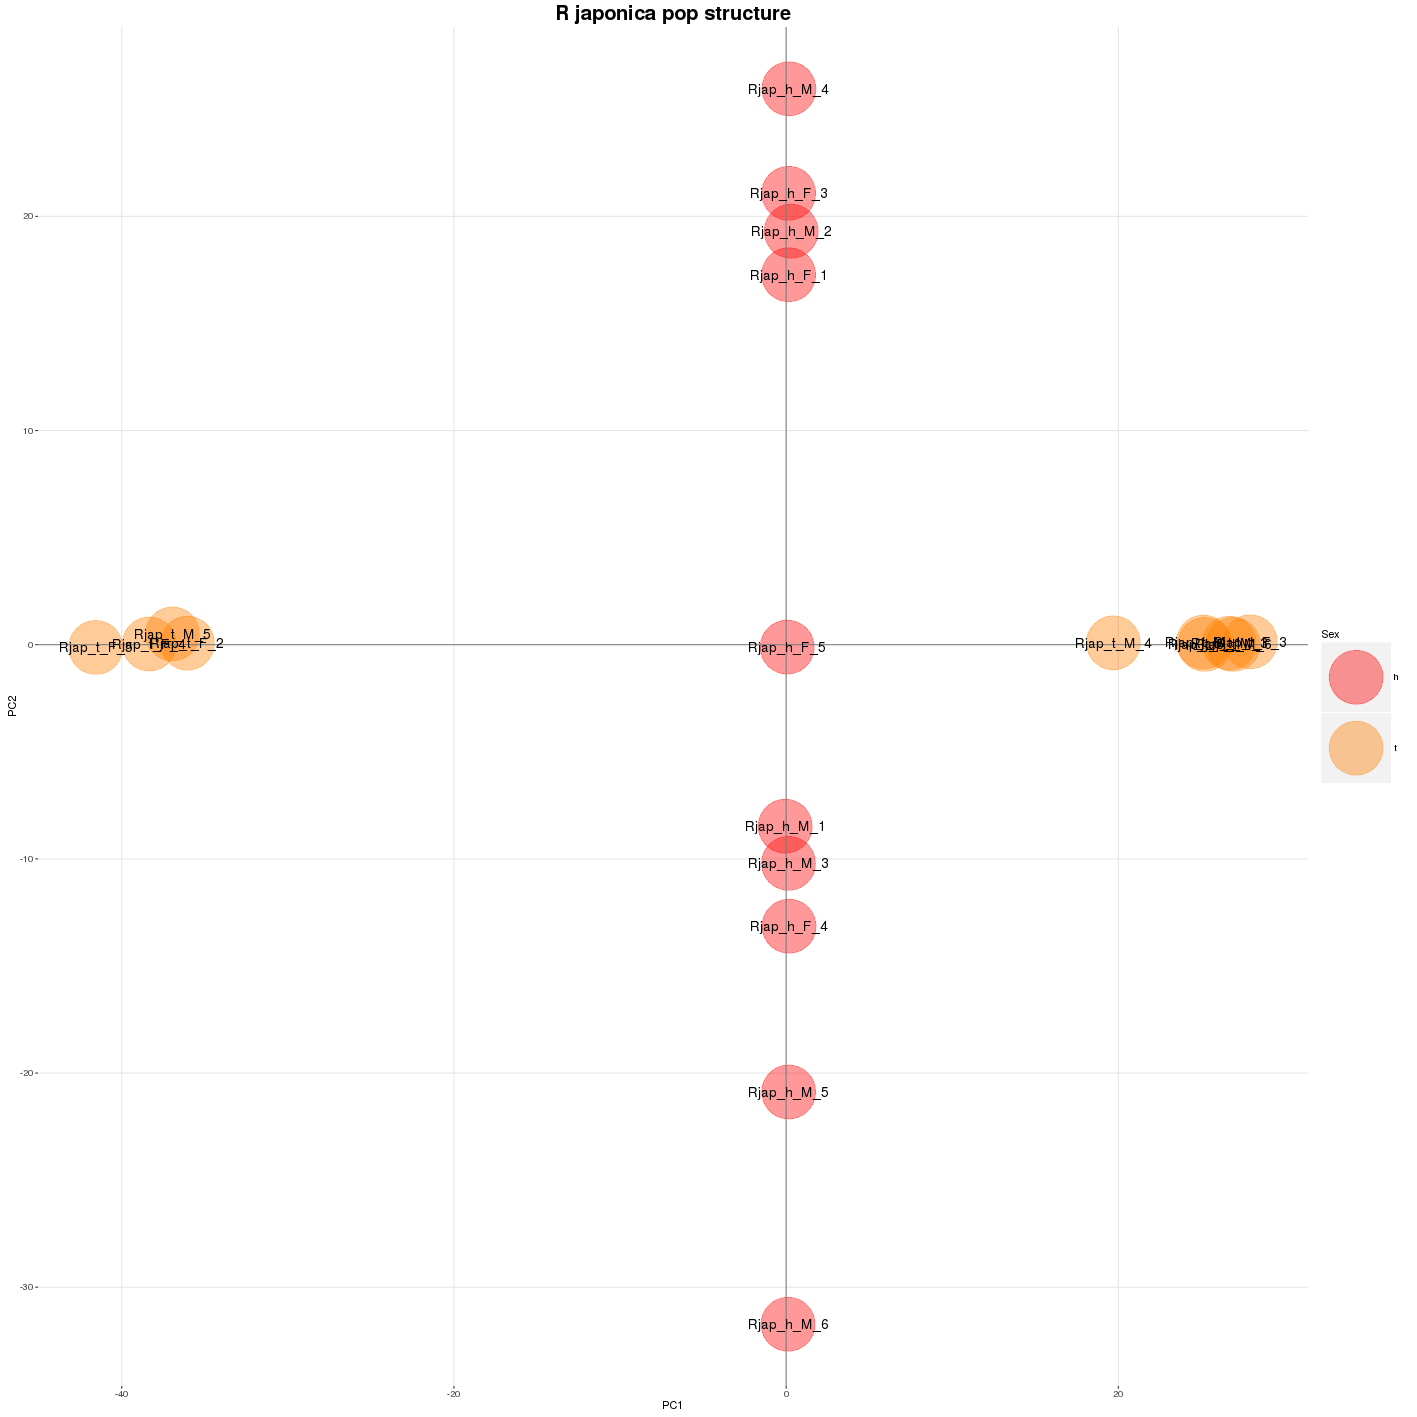

In [77]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(2,3), ## which components to plot
           Title = "R japonica pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

#### Still not really sure about these markers, mapping will tell. But there is no signal at them in the "h" Rjap population. 

### Summary:

A difficult dataset. Using both populations together is not useful, and not surprising as they are different lineages. However when splitting into the different populations I find a lot of markers in "t" but not many in h. Although h looks like it has some structure in it already. 

My confidence in these isn't so high, but they can be validated using the bootstrapping and also the mapping. 

So:

Combined samples:
XY = 34
ZW = 128

h population
XY = 72
ZW = 14

t population
XY = 651
ZW = 48

